## 1. Importaciones y lecturas 

In [ ]:
#https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243

In [1]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
a = gpd.read_file('datasets/NYPD Complaint Data Current (Year To Date)/nypd_crimes.shp')

In [3]:
a.head()

,cmplnt_num,addr_pct_c,boro_nm,date_cmpln,time_cmpln,cmplnt_fr_,date_cmp_2,time_cmp_2,cmplnt_to_,crm_atpt_c,...,vic_sex,x_coord_cd,y_coord_cd,latitude,longitude,lat_lon_ad,lat_lon_ci,lat_lon_st,lat_lon_zi,geometry
0,261548672,43.0,BRONX,2023-01-07,00:00:00.000,21:30:00,None,None,(null),COMPLETED,...,D,1026226.0,236504.0,40.815726,-73.848350,None,None,None,None,POINT (-73.84835 40.81573)
1,265065361,69.0,BROOKLYN,2022-06-12,00:00:00.000,01:55:00,None,None,(null),COMPLETED,...,E,1012661.0,177364.0,40.653454,-73.897609,None,None,None,None,POINT (-73.89761 40.65345)
2,262612530,110.0,QUEENS,2022-09-09,00:00:00.000,00:55:00,2022-09-09,00:00:00.000,01:19:00,COMPLETED,...,F,1019164.0,210169.0,40.743481,-73.874004,None,None,None,None,POINT (-73.87400 40.74348)
3,261233867,123.0,STATEN ISLAND,2023-01-02,00:00:00.000,02:00:00,2023-01-02,00:00:00.000,02:10:00,COMPLETED,...,F,917367.0,125198.0,40.510063,-74.240524,None,None,None,None,POINT (-74.24052 40.51006)
4,264778583,30.0,MANHATTAN,2021-06-29,00:00:00.000,21:00:00,2021-06-29,00:00:00.000,21:30:00,COMPLETED,...,F,998164.0,241176.0,40.828637,-73.949722,None,None,None,None,POINT (-73.94972 40.82864)


In [4]:
a.columns

Index(['cmplnt_num', 'addr_pct_c', 'boro_nm', 'date_cmpln', 'time_cmpln',
       'cmplnt_fr_', 'date_cmp_2', 'time_cmp_2', 'cmplnt_to_', 'crm_atpt_c',
       'hadevelopt', 'housing_ps', 'jurisdicti', 'juris_desc', 'ky_cd',
       'law_cat_cd', 'loc_of_occ', 'ofns_desc', 'parks_nm', 'patrol_bor',
       'pd_cd', 'pd_desc', 'prem_typ_d', 'date_rpt_d', 'time_rpt_d',
       'station_na', 'susp_age_g', 'susp_race', 'susp_sex', 'transit_di',
       'vic_age_gr', 'vic_race', 'vic_sex', 'x_coord_cd', 'y_coord_cd',
       'latitude', 'longitude', 'lat_lon_ad', 'lat_lon_ci', 'lat_lon_st',
       'lat_lon_zi', 'geometry'],
      dtype='object')

## 2. Filtrado

### 2.1 Crimenes desde hombreas a mujeres

In [10]:
data = a[(a['susp_sex'] == 'M') & (a['vic_sex'] == 'F')]

In [29]:
remove = ['lat_lon_ad','lat_lon_ci','lat_lon_st','lat_lon_zi']

In [31]:
ref_data = data.drop(columns=remove)

In [33]:
ref_data.drop_duplicates(inplace=True)

In [35]:
ref_data['ky_cd']

2         578.0
4         344.0
6         233.0
9         361.0
10        233.0
          ...  
130185    344.0
130189    233.0
130191    106.0
130193    578.0
130198    126.0
Name: ky_cd, Length: 23280, dtype: float64

In [36]:
ref_data.to_file("crimes_filtered.shp", driver="ESRI Shapefile")

### 2.2 Subconjunto de crimenes que se considerarán violencia de genero

Olvidamos guardar esta parte, pero el dataset ya está filtrado :)

### 2.3 Según fecha de denuncia

In [2]:
useful_crimes = gpd.read_file('filtered dataset/crimes_filtered.shp')
useful_crimes.to_crs('EPSG:4326', inplace=True)

Text(0.5, 1.0, 'Histogram of Crime Notifications by Year')

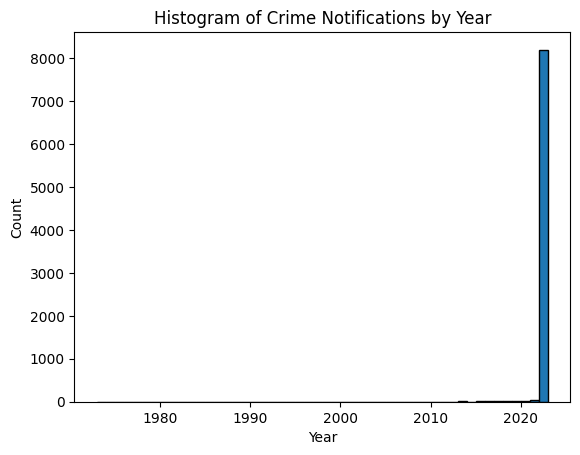

In [5]:
useful_crimes['date_cmpln'] = pd.to_datetime(useful_crimes['date_cmpln'])

# Extract the year from each date
useful_crimes['year'] = useful_crimes['date_cmpln'].dt.year

# Plot the histogram
plt.hist(useful_crimes['year'], bins=range(1973, 2024), edgecolor='black')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Crime Notifications by Year')


In [9]:
fech = useful_crimes[['date_cmpln', 'year']]
fech[fech['year'] <= 2022]

,date_cmpln,year
0,2022-09-09,2022
1,2008-01-01,2008
4,2022-01-28,2022
5,2022-06-20,2022
6,2022-12-06,2022
...,...,...
920,2020-10-01,2020
922,2022-12-31,2022
923,2022-12-17,2022
924,2017-12-31,2017


Dado que solo hay 623 datos antes de 2023, removemos y solo nos quedamos con los de este año.

In [10]:
useful_crimes = useful_crimes[useful_crimes['year'] == 2023]

In [15]:
useful_crimes

,cmplnt_num,addr_pct_c,boro_nm,date_cmpln,time_cmpln,cmplnt_fr_,date_cmp_2,time_cmp_2,cmplnt_to_,crm_atpt_c,...,vic_age_gr,vic_race,vic_sex,x_coord_cd,y_coord_cd,latitude,longitude,geometry,year,month
2,261249686,67.0,BROOKLYN,2023-01-01,00:00:00.000,16:00:00,2023-01-02,00:00:00.000,11:00:00,COMPLETED,...,25-44,BLACK,F,997843.0,175671.0,40.648851,-73.951017,POINT (-73.95102 40.64885),2023,1
3,261476713,102.0,QUEENS,2023-01-01,00:00:00.000,01:30:00,2023-01-01,00:00:00.000,01:35:00,COMPLETED,...,65+,ASIAN / PACIFIC ISLANDER,F,1032174.0,190153.0,40.688474,-73.827193,POINT (-73.82719 40.68847),2023,1
7,261408571,122.0,STATEN ISLAND,2023-01-04,00:00:00.000,10:25:00,2023-01-04,00:00:00.000,10:30:00,COMPLETED,...,25-44,WHITE,F,958872.0,153277.0,40.587351,-74.091368,POINT (-74.09137 40.58735),2023,1
12,261293577,40.0,BRONX,2023-01-03,00:00:00.000,11:55:00,2023-01-03,00:00:00.000,12:00:00,COMPLETED,...,45-64,WHITE HISPANIC,F,1009012.0,236134.0,40.814777,-73.910541,POINT (-73.91054 40.81478),2023,1
18,262230289,52.0,BRONX,2023-01-01,00:00:00.000,16:00:00,None,None,(null),COMPLETED,...,45-64,BLACK HISPANIC,F,1012929.0,254235.0,40.864446,-73.896312,POINT (-73.89631 40.86445),2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,265919364,66.0,BROOKLYN,2023-03-30,00:00:00.000,11:35:00,2023-03-30,00:00:00.000,11:44:00,COMPLETED,...,18-24,WHITE,F,993355.0,164147.0,40.617219,-73.967202,POINT (-73.96720 40.61722),2023,3
8395,265977554,32.0,MANHATTAN,2023-03-30,00:00:00.000,14:00:00,2023-03-30,00:00:00.000,14:08:00,COMPLETED,...,18-24,WHITE,F,1000683.0,234944.0,40.811529,-73.940633,POINT (-73.94063 40.81153),2023,3
8396,265988243,76.0,BROOKLYN,2023-03-31,00:00:00.000,17:00:00,2023-03-31,00:00:00.000,17:09:00,COMPLETED,...,25-44,BLACK,F,987441.0,188309.0,40.683541,-73.988493,POINT (-73.98849 40.68354),2023,3
8397,265981132,107.0,QUEENS,2023-03-30,00:00:00.000,20:00:00,2023-03-30,00:00:00.000,20:15:00,COMPLETED,...,25-44,ASIAN / PACIFIC ISLANDER,F,1036658.0,205330.0,40.730113,-73.810909,POINT (-73.81091 40.73011),2023,3


In [13]:
useful_crimes.columns

Index(['cmplnt_num', 'addr_pct_c', 'boro_nm', 'date_cmpln', 'time_cmpln',
       'cmplnt_fr_', 'date_cmp_2', 'time_cmp_2', 'cmplnt_to_', 'crm_atpt_c',
       'hadevelopt', 'housing_ps', 'jurisdicti', 'juris_desc', 'ky_cd',
       'law_cat_cd', 'loc_of_occ', 'ofns_desc', 'parks_nm', 'patrol_bor',
       'pd_cd', 'pd_desc', 'prem_typ_d', 'date_rpt_d', 'time_rpt_d',
       'station_na', 'susp_age_g', 'susp_race', 'susp_sex', 'transit_di',
       'vic_age_gr', 'vic_race', 'vic_sex', 'x_coord_cd', 'y_coord_cd',
       'latitude', 'longitude', 'geometry', 'year', 'month'],
      dtype='object')

In [ ]:
useful_crimes = useful_crimes[['date_cmpln', 'ofns_desc', 'susp_age_g', 'susp_race',
                               'vic_race', 'susp_sex', 'vic_age_gr', 'longitude', 'latitude',
                               'year', 'month', 'geometry']]

([<matplotlib.axis.XTick at 0x7fb4b58af280>,
 [Text(1, 0, 'Jan'), Text(2, 0, 'Feb'), Text(3, 0, 'Mar')])

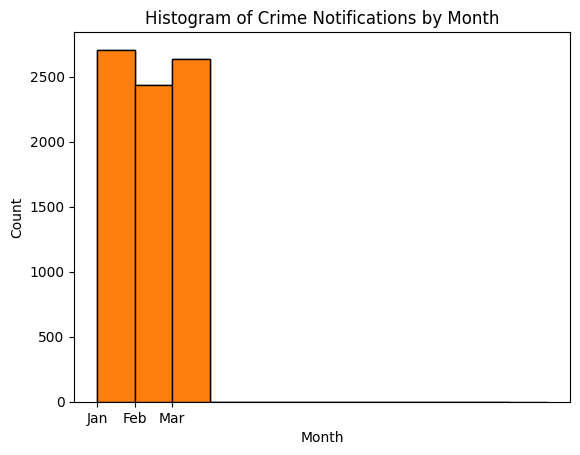

In [12]:
useful_crimes['month'] = useful_crimes['date_cmpln'].dt.month

# Plot the histogram
plt.hist(useful_crimes['month'], bins=range(1, 13), edgecolor='black')

unique_months = sorted(useful_crimes['month'].unique())

# Plot the histogram
plt.hist(useful_crimes['month'], bins=range(1, 14), edgecolor='black')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Histogram of Crime Notifications by Month')

# Set x-axis tick labels to month names
month_names = pd.date_range(start='2022-01', periods=len(unique_months), freq='M').strftime('%b')
plt.xticks(unique_months, month_names)

In [8]:
october_crimes = useful_crimes[useful_crimes['date_cmpln'].dt.month == 10]
num_october_crimes = len(october_crimes)
print("Number of crimes in October:", num_october_crimes)

Number of crimes in October: 48


Dado las limitaciones de este dataset, buscamos uno de mayor tamaño.

In [21]:
data = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
data = data[['CMPLNT_FR_DT', 'OFNS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
                         'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
                        'Latitude', 'Longitude']]

/var/folders/c5/09jvq3w14t3g3_g_84s39zw80000gn/T/ipykernel_35728/3822367133.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NYPD_Complaint_Data_Historic.csv')


In [22]:
data['OFNS_DESC'].unique()

array(['RAPE', 'GRAND LARCENY OF MOTOR VEHICLE',
       'UNAUTHORIZED USE OF A VEHICLE', 'MISCELLANEOUS PENAL LAW',
       'GRAND LARCENY', 'ROBBERY', 'ASSAULT 3 & RELATED OFFENSES',
       'FELONY ASSAULT', 'PETIT LARCENY',
       'INTOXICATED & IMPAIRED DRIVING', 'HARRASSMENT 2', 'THEFT-FRAUD',
       'POSSESSION OF STOLEN PROPERTY', 'BURGLARY',
       'OFF. AGNST PUB ORD SENSBLTY &', 'KIDNAPPING & RELATED OFFENSES',
       'ARSON', 'FORGERY', 'SEX CRIMES', 'DANGEROUS DRUGS', '(null)',
       'MURDER & NON-NEGL. MANSLAUGHTER', 'DANGEROUS WEAPONS', 'FRAUDS',
       'CRIMINAL MISCHIEF & RELATED OF', 'OTHER OFFENSES RELATED TO THEF',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES INVOLVING FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'NYS LAWS-UNCLASSIFIED FELONY', 'PETIT LARCENY OF MOTOR VEHICLE',
       'OTHER STATE LAWS (NON PENAL LA', 'ADMINISTRATIVE CODE',
       'OFFENSES AGAINST THE PERSON', 'CHILD ABANDONMENT/NON SUPPORT',
       "BURGLAR'S TOOLS", 

In [23]:
values = ['RAPE', 'HARRASSMENT 2', 'KIDNAPPING & RELATED OFFENSES', 'SEX CRIMES',
          'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'LOITERING/DEVIATE SEX', 'KIDNAPPING AND RELATED OFFENSES',
          'KIDNAPPING', 'FELONY SEX CRIMES']
data = data[data['OFNS_DESC'].isin(values)]

In [24]:
data = data[(data['SUSP_SEX'] == 'M') & (data['VIC_SEX'] == 'F')]

In [25]:
data['geometry'] = data.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)
big_crimes = gpd.GeoDataFrame(data, geometry='geometry')

In [26]:
big_crimes

,CMPLNT_FR_DT,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,geometry
0,01/01/2002,RAPE,45-64,WHITE,M,18-24,WHITE,F,NaN,NaN,POINT EMPTY
10,01/26/2006,HARRASSMENT 2,(null),WHITE HISPANIC,M,25-44,ASIAN / PACIFIC ISLANDER,F,NaN,NaN,POINT EMPTY
16,02/08/2006,HARRASSMENT 2,(null),BLACK,M,25-44,WHITE HISPANIC,F,NaN,NaN,POINT EMPTY
18,02/11/2006,HARRASSMENT 2,18-24,BLACK,M,18-24,BLACK,F,40.698474,-73.917769,POINT (-73.91777 40.69847)
21,02/17/2006,HARRASSMENT 2,45-64,BLACK,M,25-44,BLACK,F,NaN,NaN,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...
8352972,12/31/2022,HARRASSMENT 2,UNKNOWN,UNKNOWN,M,25-44,WHITE HISPANIC,F,40.757657,-73.875325,POINT (-73.87533 40.75766)
8352979,12/30/2022,SEX CRIMES,25-44,BLACK,M,<18,BLACK,F,40.682398,-73.840072,POINT (-73.84007 40.68240)
8352995,12/31/2022,HARRASSMENT 2,25-44,BLACK,M,25-44,BLACK,F,40.669766,-73.865736,POINT (-73.86574 40.66977)
8353036,12/31/2022,HARRASSMENT 2,25-44,BLACK,M,18-24,BLACK,F,40.682495,-73.924308,POINT (-73.92431 40.68250)


Text(0.5, 1.0, 'Histogram of Crime Notifications by Year')

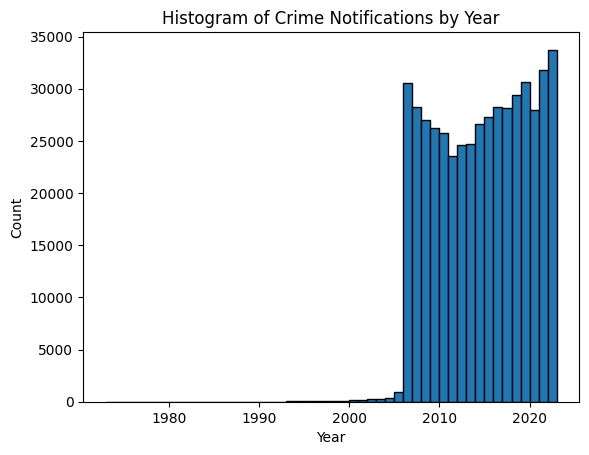

In [28]:
big_crimes['CMPLNT_FR_DT'] = pd.to_datetime(big_crimes['CMPLNT_FR_DT'], errors='coerce')

# Extract the year from each date
big_crimes['year'] = big_crimes['CMPLNT_FR_DT'].dt.year

# Plot the histogram
plt.hist(big_crimes['year'], bins=range(1973, 2024), edgecolor='black')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Crime Notifications by Year')

Podemos ver que La gran masa de crimenes la tenemos desde 2010. Dado a el volumend e datos que tenemos, nos quedaremos solo con los datos posteriores al año ___

In [29]:
data_2022 = big_crimes[big_crimes['year'] >= 2022]

In [31]:
len(data_2022)

33734

Podemos ver que Luego de filtrar, solo para el 2022 ya tenemos 33000 datos! 

/Users/terriblepollo/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


([<matplotlib.axis.XTick at 0x7fafad64d9a0>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

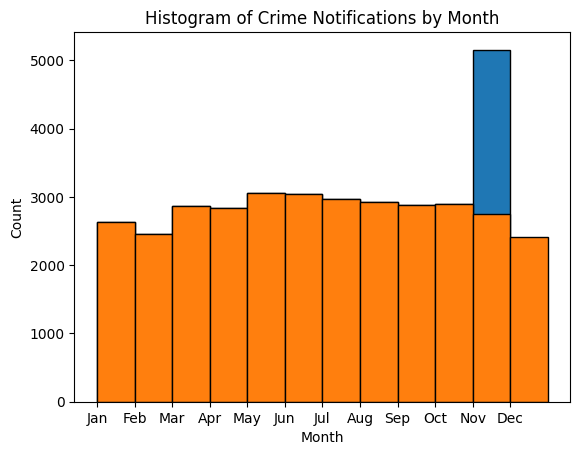

In [33]:
data_2022['month'] = data_2022['CMPLNT_FR_DT'].dt.month

# Plot the histogram
plt.hist(data_2022['month'], bins=range(1, 13), edgecolor='black')

unique_months = sorted(data_2022['month'].unique())

# Plot the histogram
plt.hist(data_2022['month'], bins=range(1, 14), edgecolor='black')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Histogram of Crime Notifications by Month')

# Set x-axis tick labels to month names
month_names = pd.date_range(start='2022-01', periods=len(unique_months), freq='M').strftime('%b')
plt.xticks(unique_months, month_names)

Teneemos data para todo el año! Desconozco que es lo azul que sobresale de noviembre. Ahora guardamos este gdf

In [35]:
data_2022.to_file("NYPD_violence_against_women.gpkg", driver="GPKG")

In [36]:
data_2022

,CMPLNT_FR_DT,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,geometry,year,month
96,2022-01-07,RAPE,UNKNOWN,BLACK,M,18-24,BLACK,F,40.887314,-73.847272,POINT (-73.84727 40.88731),2022.0,1
97,2022-01-09,RAPE,25-44,BLACK,M,25-44,BLACK,F,40.887314,-73.847272,POINT (-73.84727 40.88731),2022.0,1
7799471,2022-01-20,RAPE,<18,BLACK,M,<18,BLACK HISPANIC,F,40.822912,-73.870041,POINT (-73.87004 40.82291),2022.0,1
7821208,2022-01-01,HARRASSMENT 2,UNKNOWN,UNKNOWN,M,65+,WHITE HISPANIC,F,40.650402,-73.963258,POINT (-73.96326 40.65040),2022.0,1
7821255,2022-01-01,SEX CRIMES,25-44,ASIAN / PACIFIC ISLANDER,M,25-44,WHITE,F,40.737203,-73.983273,POINT (-73.98327 40.73720),2022.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8352972,2022-12-31,HARRASSMENT 2,UNKNOWN,UNKNOWN,M,25-44,WHITE HISPANIC,F,40.757657,-73.875325,POINT (-73.87533 40.75766),2022.0,12
8352979,2022-12-30,SEX CRIMES,25-44,BLACK,M,<18,BLACK,F,40.682398,-73.840072,POINT (-73.84007 40.68240),2022.0,12
8352995,2022-12-31,HARRASSMENT 2,25-44,BLACK,M,25-44,BLACK,F,40.669766,-73.865736,POINT (-73.86574 40.66977),2022.0,12
8353036,2022-12-31,HARRASSMENT 2,25-44,BLACK,M,18-24,BLACK,F,40.682495,-73.924308,POINT (-73.92431 40.68250),2022.0,12


In [2]:
data = gpd.read_file('NYPD_violence_against_women.gpkg')

<Axes: >

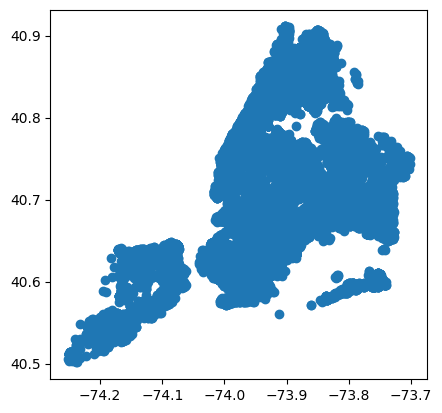

In [3]:
data.plot()